# 'DATOS ALERCE'

In [182]:
%matplotlib notebook

In [89]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import OzaBagging
from joblib import Parallel, delayed

# Vector objetivo:

In [5]:
train_labels = pd.read_csv('train_labels.csv', sep=',', na_values=['infinity'])
train_labels.set_index('challenge_oid', inplace=True)
train_labels.index.name = 'oid'
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38702 entries, 396567 to 537156
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   classALeRCE  38702 non-null  object
dtypes: object(1)
memory usage: 604.7+ KB


In [6]:
df_stream = pd.read_csv('train_labels.csv')

In [7]:
df_stream.head()


,challenge_oid,classALeRCE
0,396567,LPV
1,259922,RRL
2,277015,RRL
3,94493,LPV
4,647304,EB


In [12]:
#df_stream.to_excel('output21.xlsx')

In [8]:
train_labels = pd.DataFrame(train_labels)
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38702 entries, 396567 to 537156
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   classALeRCE  38702 non-null  object
dtypes: object(1)
memory usage: 604.7+ KB


In [9]:
train_labels.head()

,classALeRCE
oid,
396567,LPV
259922,RRL
277015,RRL
94493,LPV
647304,EB


In [10]:
train_labels.classALeRCE.unique()

array(['LPV', 'RRL', 'EB', 'QSO', 'YSO', 'CV/Nova', 'Blazar', 'DSCT',
       'Ceph', 'AGN', 'SNIa', 'Periodic-Other', 'SNII', 'SNIbc'],
      dtype=object)

In [11]:
train_labels.classALeRCE.unique()

array(['LPV', 'RRL', 'EB', 'QSO', 'YSO', 'CV/Nova', 'Blazar', 'DSCT',
       'Ceph', 'AGN', 'SNIa', 'Periodic-Other', 'SNII', 'SNIbc'],
      dtype=object)

In [12]:
train_labels['classALeRCE'].value_counts()

EB                11383
LPV               10297
RRL               10159
QSO                3814
AGN                 805
YSO                 514
Periodic-Other      340
Blazar              335
SNIa                272
CV/Nova             270
DSCT                225
Ceph                193
SNII                 78
SNIbc                17
Name: classALeRCE, dtype: int64

In [13]:
first_labels=train_labels.copy()
print(train_labels.classALeRCE.unique())


['LPV' 'RRL' 'EB' 'QSO' 'YSO' 'CV/Nova' 'Blazar' 'DSCT' 'Ceph' 'AGN'
 'SNIa' 'Periodic-Other' 'SNII' 'SNIbc']


In [16]:
#pos=np.where(np.logical_or(first_labels=="LPV",np.logical_or(first_labels=="AGN",np.logical_or(first_labels=="YSO",np.logical_or(first_labels=="QSO",np.logical_or(first_labels=="CV/Nova",first_labels=="Blazar"))))))
#first_labels.classALeRCE[first_labels.index[pos[0]]]="Stochastic"
#pos=np.where(np.logical_or(first_labels=="RRL",np.logical_or(first_labels=="EB",np.logical_or(first_labels=="DSCT",np.logical_or(first_labels=="Periodic-Other",first_labels=="Ceph")))))
#first_labels.classALeRCE[first_labels.index[pos[0]]]="Periodic"
#pos=np.where(np.logical_or(first_labels=="SNIa",np.logical_or(first_labels=="SNII",first_labels=="SNIbc")))
#first_labels.classALeRCE[first_labels.index[pos[0]]]="Transient"
#print(first_labels.classALeRCE.unique())
#print(train_labels.classALeRCE.unique())

In [14]:
pos=np.where(np.logical_or(first_labels=="LPV",np.logical_or(first_labels=="AGN",np.logical_or(first_labels=="YSO",np.logical_or(first_labels=="QSO",np.logical_or(first_labels=="CV/Nova",first_labels=="Blazar"))))))
first_labels.classALeRCE[first_labels.index[pos[0]]]=1
pos=np.where(np.logical_or(first_labels=="RRL",np.logical_or(first_labels=="EB",np.logical_or(first_labels=="DSCT",np.logical_or(first_labels=="Periodic-Other",first_labels=="Ceph")))))
first_labels.classALeRCE[first_labels.index[pos[0]]]=2
pos=np.where(np.logical_or(first_labels=="SNIa",np.logical_or(first_labels=="SNII",first_labels=="SNIbc")))
first_labels.classALeRCE[first_labels.index[pos[0]]]=3
print(first_labels.classALeRCE.unique())
print(train_labels.classALeRCE.unique())

[1 2 3]
['LPV' 'RRL' 'EB' 'QSO' 'YSO' 'CV/Nova' 'Blazar' 'DSCT' 'Ceph' 'AGN'
 'SNIa' 'Periodic-Other' 'SNII' 'SNIbc']


In [15]:

2#periodic = ["RRL", "EB", "DSCT", "Ceph", "Periodic-Other"]
1#stochastic = ["AGN", "QSO", "YSO", "CV/Nova", "LPV", "Blazar"]
3#transient = ["SNIa", "SNII", "SNIbc"]

3

In [16]:
print(train_labels.classALeRCE.unique())

['LPV' 'RRL' 'EB' 'QSO' 'YSO' 'CV/Nova' 'Blazar' 'DSCT' 'Ceph' 'AGN'
 'SNIa' 'Periodic-Other' 'SNII' 'SNIbc']


In [17]:
print(first_labels.classALeRCE.unique())

[1 2 3]


In [18]:
first_labels.head()

,classALeRCE
oid,
396567,1
259922,2
277015,2
94493,1
647304,2


In [19]:
first_labels['classALeRCE'].value_counts()

2    22300
1    16035
3      367
Name: classALeRCE, dtype: int64

In [20]:
train_labels.dropna()

,classALeRCE
oid,
396567,LPV
259922,RRL
277015,RRL
94493,LPV
647304,EB
...,...
335791,LPV
383125,RRL
539873,RRL


# Variables:

In [21]:
features = pd.read_pickle('train_features.pkl')

In [22]:
features.head()

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,paps_low_1,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1
oid,,,,,,,,,,,,,,,,,,,,,
641,0.196426,0.396822,0.683473,0.998053,3.0,1.0,0.333333,0.272727,0.0,0.0,...,0.364697,0.130434,7.0,5.0,3.345246,1323.936083,0.000000,0.727273,0.750000,1.000000
812,0.045131,NaN,0.442281,NaN,1.0,NaN,0.375000,NaN,0.0,NaN,...,2.237339,NaN,5.0,NaN,4.533474,NaN,0.000000,NaN,0.918571,0.984583
839,0.558078,0.537601,0.814828,0.943326,1.0,1.0,0.347826,0.153846,0.0,0.0,...,1.316261,1.004523,9.0,0.0,12.483542,NaN,0.956522,0.923077,0.881667,0.997500
1416,0.186727,0.153131,0.852811,0.999383,1.0,1.0,0.363636,0.428571,0.0,0.0,...,0.193425,0.003095,4.0,10.0,6.540455,8.999825,0.181818,0.214286,0.720000,1.000000
1651,0.681486,0.450269,0.348828,0.563064,1.0,1.0,0.384615,0.285714,0.0,0.0,...,0.005796,0.001990,9.0,1.0,70.934587,0.967639,0.615385,0.714286,0.760714,0.993333


In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38685 entries, 641 to 690629
Columns: 150 entries, Amplitude_1 to sgscore1
dtypes: float64(150)
memory usage: 44.6 MB


In [24]:
features.describe()

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,paps_low_1,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1
count,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,...,33361.000000,30678.000000,34091.000000,31517.000000,3.002100e+04,2.692000e+04,34091.000000,31517.000000,38685.000000,38685.000000
mean,0.451476,0.384228,0.913196,0.903741,2.220879,2.221785,0.348834,0.338410,0.001885,0.001910,...,5.577529,2.254475,25.682556,22.502967,1.676733e+10,8.418327e+10,0.470433,0.468664,0.787270,0.840723
std,0.457792,0.385683,0.190636,0.200429,3.025456,3.250693,0.119356,0.113446,0.009632,0.009741,...,52.828388,21.314568,34.421117,33.521269,6.609218e+12,1.280533e+13,0.326131,0.332022,0.078931,7.192430
min,0.006574,0.007370,0.114766,0.110287,1.000000,1.000000,0.016949,0.000000,0.000000,0.000000,...,-0.290449,-0.100955,0.000000,0.000000,-7.603444e+14,-1.916440e+13,0.000000,0.000000,0.556667,-999.000000
25%,0.193760,0.178272,0.967536,0.950000,1.000000,1.000000,0.272727,0.266667,0.000000,0.000000,...,0.009975,0.002856,5.000000,4.000000,2.283564e+00,2.109079e+00,0.208333,0.181818,0.730000,0.940458
50%,0.319268,0.280422,0.999965,0.999896,1.000000,1.000000,0.347826,0.333333,0.000000,0.000000,...,0.106905,0.033242,14.000000,11.000000,9.069720e+00,8.569265e+00,0.441176,0.444444,0.786429,0.989226
75%,0.546899,0.426055,1.000000,1.000000,2.000000,2.000000,0.428571,0.417582,0.000000,0.000000,...,0.954981,0.288844,33.000000,27.000000,1.080832e+02,1.048954e+02,0.717949,0.729730,0.844286,0.998750
max,4.153189,3.491099,1.000000,1.000000,50.000000,71.000000,0.750000,0.764706,0.120370,0.134328,...,4178.005927,2163.166232,442.000000,507.000000,6.374897e+14,2.097029e+15,1.000000,1.000000,0.973571,1.000000


In [26]:
import missingno as msno
%matplotlib inline

In [27]:
df=pd.merge(features,first_labels,on='oid')
df.head()

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
641,0.196426,0.396822,0.683473,0.998053,3.0,1.0,0.333333,0.272727,0.0,0.0,...,0.130434,7.0,5.0,3.345246,1323.936083,0.000000,0.727273,0.750000,1.000000,1
812,0.045131,NaN,0.442281,NaN,1.0,NaN,0.375000,NaN,0.0,NaN,...,NaN,5.0,NaN,4.533474,NaN,0.000000,NaN,0.918571,0.984583,1
839,0.558078,0.537601,0.814828,0.943326,1.0,1.0,0.347826,0.153846,0.0,0.0,...,1.004523,9.0,0.0,12.483542,NaN,0.956522,0.923077,0.881667,0.997500,2
1416,0.186727,0.153131,0.852811,0.999383,1.0,1.0,0.363636,0.428571,0.0,0.0,...,0.003095,4.0,10.0,6.540455,8.999825,0.181818,0.214286,0.720000,1.000000,2
1651,0.681486,0.450269,0.348828,0.563064,1.0,1.0,0.384615,0.285714,0.0,0.0,...,0.001990,9.0,1.0,70.934587,0.967639,0.615385,0.714286,0.760714,0.993333,2


In [28]:
cols = df.columns.tolist()

In [29]:
#df_fin=df.dropna()
#df_fin.head()

In [30]:
df.describe()

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,paps_low_1,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1
count,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,34091.000000,31517.000000,...,33361.000000,30678.000000,34091.000000,31517.000000,3.002100e+04,2.692000e+04,34091.000000,31517.000000,38685.000000,38685.000000
mean,0.451476,0.384228,0.913196,0.903741,2.220879,2.221785,0.348834,0.338410,0.001885,0.001910,...,5.577529,2.254475,25.682556,22.502967,1.676733e+10,8.418327e+10,0.470433,0.468664,0.787270,0.840723
std,0.457792,0.385683,0.190636,0.200429,3.025456,3.250693,0.119356,0.113446,0.009632,0.009741,...,52.828388,21.314568,34.421117,33.521269,6.609218e+12,1.280533e+13,0.326131,0.332022,0.078931,7.192430
min,0.006574,0.007370,0.114766,0.110287,1.000000,1.000000,0.016949,0.000000,0.000000,0.000000,...,-0.290449,-0.100955,0.000000,0.000000,-7.603444e+14,-1.916440e+13,0.000000,0.000000,0.556667,-999.000000
25%,0.193760,0.178272,0.967536,0.950000,1.000000,1.000000,0.272727,0.266667,0.000000,0.000000,...,0.009975,0.002856,5.000000,4.000000,2.283564e+00,2.109079e+00,0.208333,0.181818,0.730000,0.940458
50%,0.319268,0.280422,0.999965,0.999896,1.000000,1.000000,0.347826,0.333333,0.000000,0.000000,...,0.106905,0.033242,14.000000,11.000000,9.069720e+00,8.569265e+00,0.441176,0.444444,0.786429,0.989226
75%,0.546899,0.426055,1.000000,1.000000,2.000000,2.000000,0.428571,0.417582,0.000000,0.000000,...,0.954981,0.288844,33.000000,27.000000,1.080832e+02,1.048954e+02,0.717949,0.729730,0.844286,0.998750
max,4.153189,3.491099,1.000000,1.000000,50.000000,71.000000,0.750000,0.764706,0.120370,0.134328,...,4178.005927,2163.166232,442.000000,507.000000,6.374897e+14,2.097029e+15,1.000000,1.000000,0.973571,1.000000


In [31]:
df['classALeRCE'].value_counts()

2    22289
1    16029
3      367
Name: classALeRCE, dtype: int64

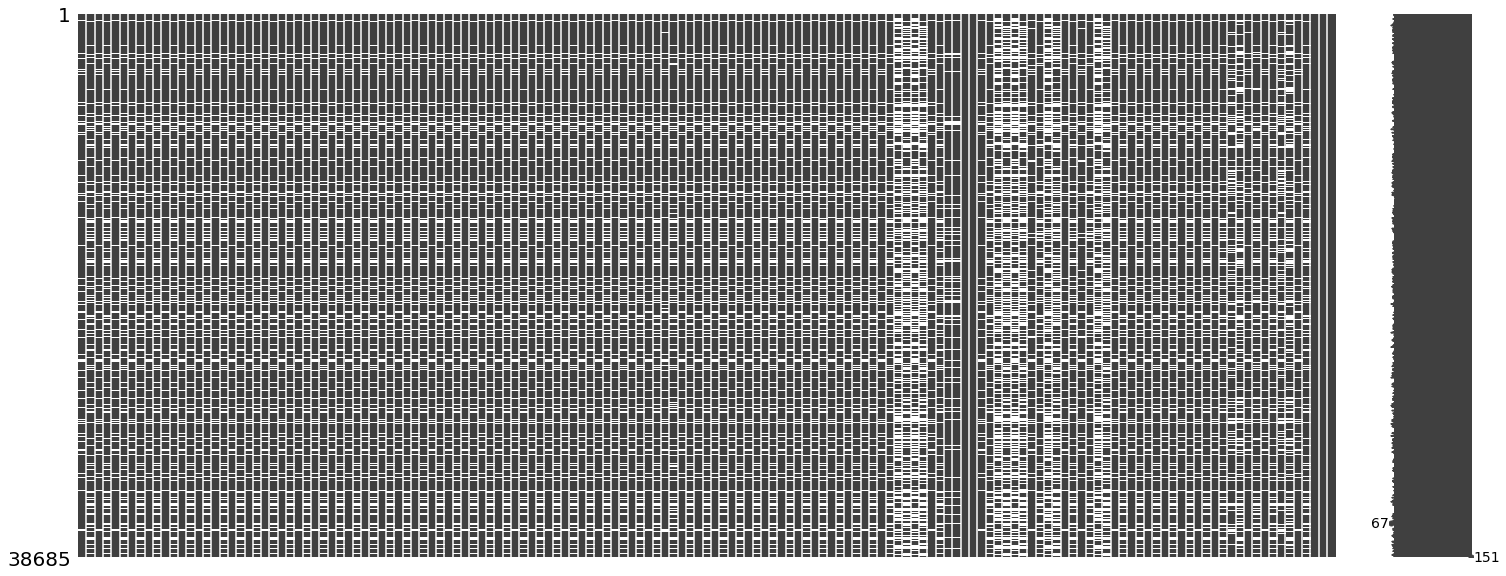

In [32]:
msno.matrix(df)

In [33]:
cols = df.columns.tolist()

In [132]:
#df_fin.to_excel('df_fin_ALE.xlsx')

In [133]:
#df_fin.to_csv('df_fin_ALE.csv')

In [34]:
# assert len(features) == len(train_labels)
train_labels = train_labels.loc[features.index.values].copy()
features = features.loc[train_labels.index.values].copy()

## Imputacion de datos faltantes:

In [35]:
df_clean_filas=df.dropna(axis = 0)

In [36]:
df_clean_filas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9699 entries, 8213 to 676681
Columns: 151 entries, Amplitude_1 to classALeRCE
dtypes: float64(150), object(1)
memory usage: 11.2+ MB


In [37]:
df_clean_filas.head()

,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
8213,0.235673,0.182528,1.000000,1.000000,5.0,4.0,0.482759,0.368421,0.0,0.0,...,0.003351,20.0,11.0,3.290918,28.550218,0.275862,0.315789,0.782143,0.512330,1
8337,0.547051,0.418821,0.999980,1.000000,1.0,1.0,0.478261,0.545455,0.0,0.0,...,0.366392,16.0,23.0,0.791846,2.719942,0.434783,0.454545,0.853095,0.990208,2
10636,0.233577,0.229972,1.000000,1.000000,1.0,1.0,0.390244,0.285714,0.0,0.0,...,0.010543,29.0,19.0,7.380557,4.244444,0.512195,0.714286,0.767143,1.000000,2
10770,0.112135,0.093886,0.778768,0.598666,1.0,1.0,0.222222,0.428571,0.0,0.0,...,3.211970,8.0,6.0,2.724132,2.985545,1.000000,1.000000,0.927143,1.000000,1
19359,0.440421,0.310171,0.999737,0.999898,1.0,1.0,0.500000,0.388889,0.0,0.0,...,0.706505,7.0,8.0,5.608353,8.437688,0.571429,0.611111,0.888571,0.999167,2


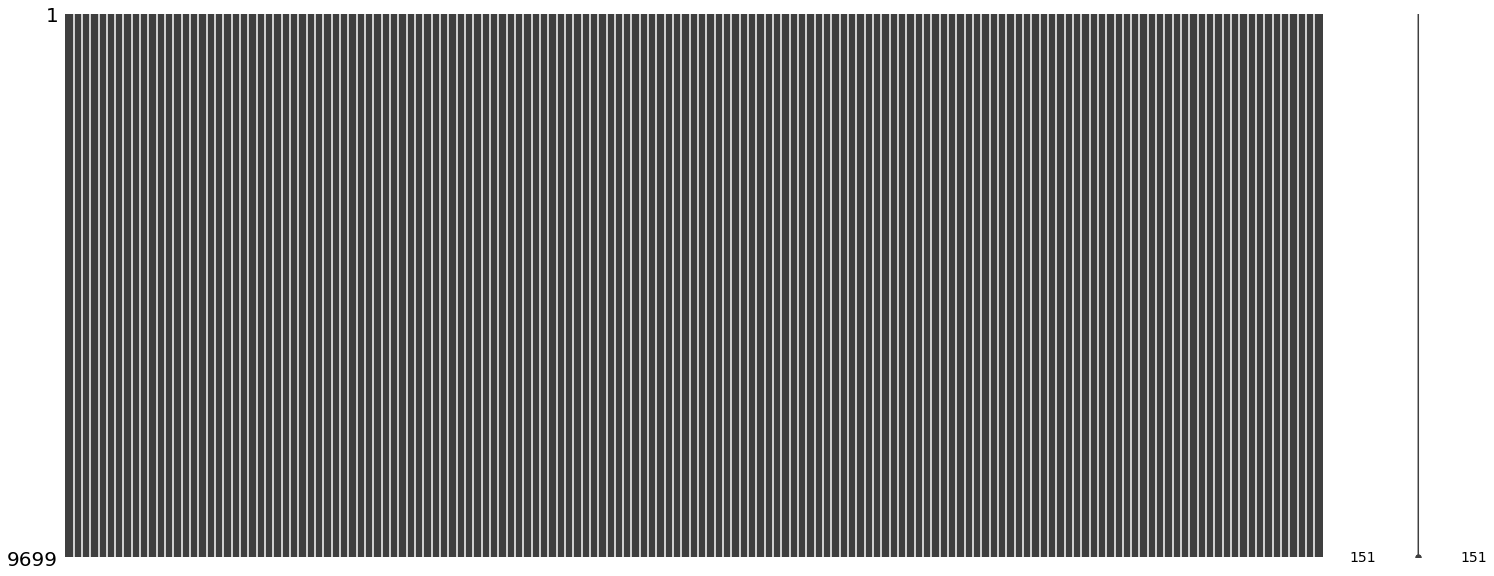

In [38]:
msno.matrix(df_clean_filas)

In [39]:
df_clean_colum=df.dropna(axis = 1)

In [40]:
df_clean_colum.head()

,gal_b,gal_l,rb,sgscore1,classALeRCE
oid,,,,,
641,-3.078319,59.374487,0.750000,1.000000,1
812,-42.274072,203.009998,0.918571,0.984583,1
839,-47.816583,202.191290,0.881667,0.997500,2
1416,-69.289818,143.845320,0.720000,1.000000,2
1651,48.236212,304.676823,0.760714,0.993333,2


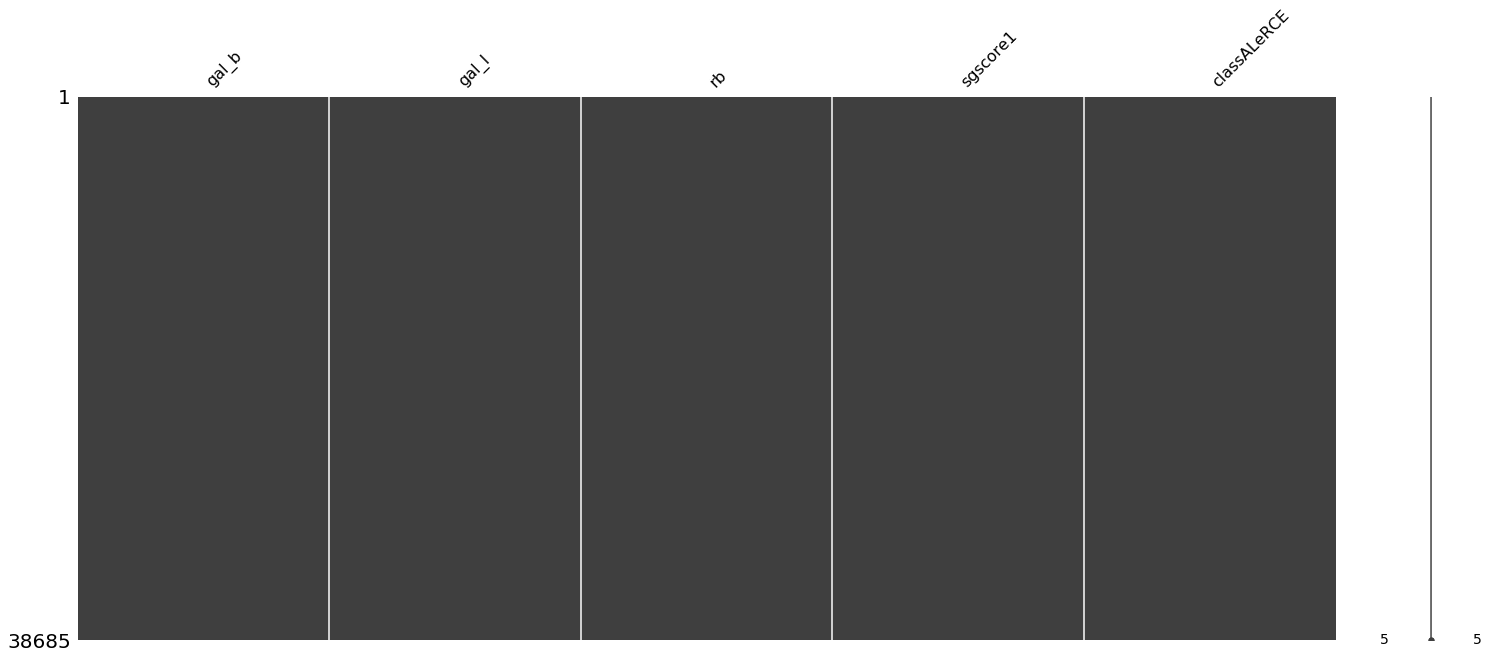

In [42]:
msno.matrix(df_clean_colum)

In [44]:
df_clean_colum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38685 entries, 641 to 690629
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gal_b        38685 non-null  float64
 1   gal_l        38685 non-null  float64
 2   rb           38685 non-null  float64
 3   sgscore1     38685 non-null  float64
 4   classALeRCE  38685 non-null  object 
dtypes: float64(4), object(1)
memory usage: 1.8+ MB


# Exportar datos a CSV:

In [42]:
#df_clean_colum.to_excel('df_fin_ALE.xlsx')

In [43]:
#df_clean_filas.to_csv('df_fin_ALE_filas.csv')

In [41]:
#df_fin.info()

# Importar datos limpios CSV  :

In [56]:
df_stream1 = pd.read_csv('C:/Users/yerko/Anaconda3/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_filas.csv')
df_stream1.describe()

,oid,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,...,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1,classALeRCE
count,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,...,9699.000000,9699.000000,9699.000000,9.699000e+03,9.699000e+03,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000
mean,346448.603052,0.413414,0.357055,0.920867,0.911909,2.741829,2.645324,0.342411,0.333024,0.003003,...,2.284454,35.347355,28.729457,6.177710e+08,2.288149e+11,0.491401,0.483722,0.788406,0.782763,1.529539
std,198422.271842,0.392286,0.362795,0.182799,0.194241,3.524354,3.685064,0.114921,0.111104,0.012090,...,11.760035,38.593191,35.858841,4.784953e+10,2.133193e+13,0.352263,0.351106,0.076145,10.155317,0.528843
min,53.000000,0.012033,0.010633,0.114766,0.122393,1.000000,1.000000,0.016949,0.025000,0.000000,...,-0.038041,1.000000,1.000000,-1.366751e+06,-1.916440e+13,0.000000,0.000000,0.588571,-999.000000,1.000000
25%,173403.000000,0.192298,0.168039,0.981651,0.967387,1.000000,1.000000,0.269231,0.258065,0.000000,...,0.001869,10.000000,7.000000,2.783158e+00,2.146800e+00,0.181818,0.163028,0.732857,0.938786,1.000000
50%,345780.000000,0.308352,0.263057,0.999998,0.999987,1.000000,1.000000,0.342105,0.333333,0.000000,...,0.025250,22.000000,16.000000,1.191765e+01,9.670909e+00,0.466667,0.464286,0.782857,0.989083,2.000000
75%,516615.500000,0.508060,0.402342,1.000000,1.000000,3.000000,3.000000,0.416667,0.410256,0.000000,...,0.294124,47.000000,35.000000,9.730027e+01,9.011661e+01,0.825000,0.800000,0.841429,0.998750,2.000000
max,691209.000000,3.631870,3.491099,1.000000,1.000000,38.000000,57.000000,0.750000,0.700000,0.120370,...,438.250371,442.000000,455.000000,4.554155e+12,2.097029e+15,1.000000,1.000000,0.973571,1.000000,3.000000


In [66]:
X = np.array(df_stream1.drop(['classALeRCE'],1))

y = np.array(df_stream1['classALeRCE'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [67]:
#################### Logistica Simple #############
from sklearn import feature_selection
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)


0.49003436426116836

In [69]:
from time import time
tiempo_inicial = time() 
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.12055253982543945

In [73]:
from time import time
tiempo_inicial = time() 
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)
tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.11659836769104004

In [71]:
################## Arbol ###############

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

0.9573883161512028

In [74]:
from time import time
tiempo_inicial = time() 

model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

3.108931064605713

In [48]:
################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)


0.9137457044673539

In [75]:
from time import time
tiempo_inicial = time() 
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.0743100643157959

In [76]:
############ Perceptron ###########

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)


0.3766323024054983

In [77]:
from time import time
tiempo_inicial = time() 
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.2618706226348877

# Seleccion de variables

In [119]:
"""
Create a Decision Stump
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
from sklearn.ensemble import ExtraTreesClassifier

In [120]:
dataset = pd.read_csv('C:/Users/yerko/Anaconda3/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_filas.csv')


In [121]:
dataset['classALeRCE'].value_counts()

2    4840
1    4711
3     148
Name: classALeRCE, dtype: int64

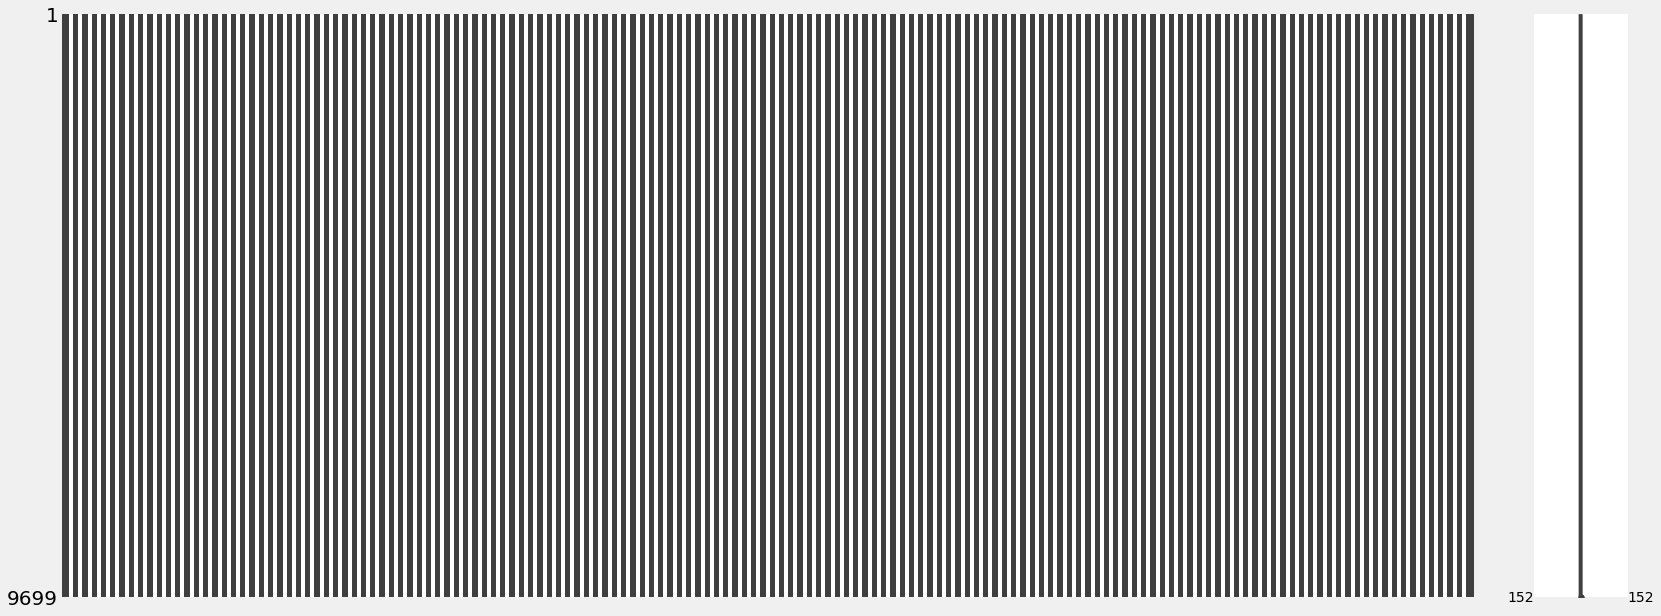

In [122]:
msno.matrix(dataset)

In [123]:
dataset

,oid,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,...,paps_low_2,paps_non_zero_1,paps_non_zero_2,paps_ratio_1,paps_ratio_2,positive_fraction_1,positive_fraction_2,rb,sgscore1,classALeRCE
0,8213,0.235673,0.182528,1.000000,1.000000,5.0,4.0,0.482759,0.368421,0.0,...,0.003351,20.0,11.0,3.290918,28.550218,0.275862,0.315789,0.782143,0.512330,1
1,8337,0.547051,0.418821,0.999980,1.000000,1.0,1.0,0.478261,0.545455,0.0,...,0.366392,16.0,23.0,0.791846,2.719942,0.434783,0.454545,0.853095,0.990208,2
2,10636,0.233577,0.229972,1.000000,1.000000,1.0,1.0,0.390244,0.285714,0.0,...,0.010543,29.0,19.0,7.380557,4.244444,0.512195,0.714286,0.767143,1.000000,2
3,10770,0.112135,0.093886,0.778768,0.598666,1.0,1.0,0.222222,0.428571,0.0,...,3.211970,8.0,6.0,2.724132,2.985545,1.000000,1.000000,0.927143,1.000000,1
4,19359,0.440421,0.310171,0.999737,0.999898,1.0,1.0,0.500000,0.388889,0.0,...,0.706505,7.0,8.0,5.608353,8.437688,0.571429,0.611111,0.888571,0.999167,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,661399,0.334123,0.227281,1.000000,1.000000,1.0,1.0,0.205882,0.461538,0.0,...,0.224333,17.0,14.0,2.146947,52.644745,0.235294,0.461538,0.805000,0.997500,2
9695,666252,0.461161,0.557242,0.999557,0.952200,1.0,1.0,0.363636,0.333333,0.0,...,0.007620,4.0,3.0,4.716270,2.444654,0.545455,0.444444,0.792143,0.989167,2
9696,674708,0.641877,0.443411,1.000000,1.000000,1.0,1.0,0.451613,0.615385,0.0,...,2.867076,24.0,17.0,3.960895,174.519504,0.193548,0.384615,0.880000,0.983542,2
9697,675332,0.476505,0.342868,1.000000,1.000000,1.0,1.0,0.454128,0.471429,0.0,...,0.003536,210.0,135.0,1.733047,2.662778,0.224771,0.650000,0.818571,0.998750,2


In [138]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import numpy as np

# CARGAR DATOS
# -------------------------------------------------------------------
dataset = pd.read_csv('C:/Users/yerko/Anaconda3/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_filas.csv')

clase_name = 'classALeRCE' # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)
clase   = dataset[clase_name].tolist() # array con variable a predecir
clase   = np.array(clase)


# CONVIERTE DATA.FRAME EN MATRIZ npy
# -------------------------------------------------------------------
dataset = dataset.drop(clase_name,1) # borra la clase del data set
dataset = dataset.to_numpy() # convierte en matriz
dataset = np.matrix(dataset) # convierte en matriz npy

# MODELO
# -------------------------------------------------------------------
model = ExtraTreesClassifier()
model.fit(dataset, clase)


# IMPORTANCIA VARIABLES
# -------------------------------------------------------------------
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':model.feature_importances_.tolist()
 })
print (var_imp.sort_values(by = 'v_importance', ascending=False))

                 feature  v_importance
50             IAR_phi_2      0.126702
49             IAR_phi_1      0.111290
105              g-r_max      0.042464
81                 Rcs_1      0.040702
82                 Rcs_2      0.039213
..                   ...           ...
24     Harmonics_mag_2_2      0.000560
30     Harmonics_mag_5_2      0.000557
22     Harmonics_mag_1_2      0.000552
34     Harmonics_mag_7_2      0.000543
40   Harmonics_phase_3_2      0.000539

[151 rows x 2 columns]


In [ ]:
#49,50,106,105,82,126,6,138,81,5,119,17,55,91,67,77,57,148,78,125,84,3,85,120

In [21]:
dataset = pd.read_csv('C:/Users/yerko/Anaconda3/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_filas.csv')

df_stream1=dataset.iloc[:, [49,50,106,105,82,126,6,138,81,5,119,17,55,91,67,77,57,148,78,125,84,3,85,120,-1]]
df_stream1.describe()

,IAR_phi_1,IAR_phi_2,g-r_mean,g-r_max,Rcs_2,min_mag_2,Autocor_length_2,paps_PN_flag_2,Rcs_1,Autocor_length_1,...,Pvar_1,Meanvariance_1,positive_fraction_2,Pvar_2,min_mag_1,SF_ML_amplitude_2,AndersonDarling_1,SF_ML_gamma_1,mean_mag_2,classALeRCE
count,9.699000e+03,9.699000e+03,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,...,9.699000e+03,9699.000000,9699.000000,9.699000e+03,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000
mean,6.185966e-01,6.115592e-01,0.987790,0.922495,0.291896,15.569934,2.645324,0.440870,0.280729,2.741829,...,9.278999e-01,0.015505,0.483722,9.242479e-01,16.492430,0.799970,0.920867,0.257711,15.946847,1.529539
std,4.229023e-01,4.248653e-01,1.063773,1.088168,0.097006,1.809419,3.685064,0.496517,0.102107,3.524354,...,2.271172e-01,0.014450,0.351106,2.356312e-01,1.652582,1.935322,0.182799,0.513200,1.775481,0.528843
min,3.334474e-13,3.354038e-13,-1.719590,-1.659080,0.063780,10.516517,1.000000,0.000000,0.049408,1.000000,...,2.040371e-18,0.000378,0.000000,5.400135e-11,11.488517,-0.500000,0.114766,-0.500000,12.026514,1.000000
25%,6.338516e-02,3.731507e-02,0.216873,0.097052,0.214260,14.189855,1.000000,0.000000,0.197348,1.000000,...,1.000000e+00,0.007235,0.163028,1.000000e+00,15.326724,0.161206,0.981651,-0.014443,14.577569,1.000000
50%,8.801507e-01,8.670653e-01,0.515534,0.470743,0.290989,15.402381,1.000000,0.000000,0.280444,1.000000,...,1.000000e+00,0.012423,0.464286,1.000000e+00,16.584840,0.298205,0.999998,0.106551,15.830259,2.000000
75%,9.888482e-01,9.895371e-01,1.850155,1.800926,0.370882,16.899120,3.000000,1.000000,0.364225,3.000000,...,1.000000e+00,0.018939,0.800000,1.000000e+00,17.732403,0.518866,1.000000,0.461814,17.275053,2.000000
max,1.000000e+00,1.000000e+00,6.011124,5.840322,0.496453,20.532553,57.000000,1.000000,0.498898,38.000000,...,1.000000e+00,0.149043,1.000000,1.000000e+00,21.507551,15.000000,1.000000,3.000000,20.951188,3.000000


In [22]:
df_stream1['classALeRCE'].value_counts()

2    4840
1    4711
3     148
Name: classALeRCE, dtype: int64

# Modelos:

## Batch:

In [23]:
X = np.array(df_stream1.drop(['classALeRCE'],1))

y = np.array(df_stream1['classALeRCE'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [24]:
#################### Logistica Simple #############
from sklearn import feature_selection
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)


0.9467353951890034

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9441813294312621, 0.9467353951890034, 0.9452358980346958, None)

In [142]:
from time import time
tiempo_inicial = time() 
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.6707487106323242

In [27]:
################## Arbol ###############

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

0.9601374570446736

In [28]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9604311197470462, 0.9601374570446736, 0.9602707376577069, None)

In [30]:
f1_score(y_test, predictions, zero_division=0)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [144]:
from time import time
tiempo_inicial = time() 

model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.36330389976501465

In [31]:
################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)


0.9137457044673539

In [146]:
from time import time
tiempo_inicial = time() 
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.012390375137329102

In [32]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9463858925785653, 0.9137457044673539, 0.9247923787214855, None)

In [33]:
############ Perceptron ###########

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)


0.8848797250859106

In [34]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.8907946810567563, 0.8848797250859106, 0.8819584373586866, None)

In [148]:
from time import time
tiempo_inicial = time() 
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.0390772819519043

In [149]:
from time import time
tiempo_inicial = time() 
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.028381824493408203

# Comparacion Ensembles :

### Naive Bayes:

In [35]:
################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
nb_prediction_proba = model_nbayes.predict_proba(X_test)[:, 1]
model_nbayes.score(X_test,y_test)

0.9137457044673539

In [36]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9463858925785653, 0.9137457044673539, 0.9247923787214855, None)

### Bagging con Naive Bayes como Weak Learner:

In [38]:

### Bagging Naives Bayes
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)

0.9168384879725086

In [40]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9466416647224836, 0.9168384879725086, 0.9270110373514724, None)

### Boosting con Naive Bayes como Weak Learners:

In [41]:
from sklearn.ensemble import AdaBoostClassifier

# Utilizando AdaBoost para aumentar la precisión
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=250, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)



0.8725085910652921

In [42]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.887188666507498, 0.8725085910652921, 0.8708424457526547, None)

In [153]:
from time import time
tiempo_inicial = time() 
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=250, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict
tiempo_final = time() 
# Ajuste de ensamble 
tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

6.4257354736328125

# Ajuste de ensamble 

In [155]:
X = np.array(df_stream1.drop(['classALeRCE'],1))

Y = np.array(df_stream1['classALeRCE'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [157]:
dataset=df_stream1
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1)




predictions = np.mean(cross_validate(Tree_model,X,Y,cv=100)['test_score'])


print('The accuracy is: ',predictions*100,'%')
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def fit(self):
        # Set the descriptive features and the target feature
        X = self.dataset.drop(['classALeRCE'],axis=1)
        Y = self.dataset['classALeRCE'].where(self.dataset['classALeRCE']==1,-1)

        # Initialize the weights of each sample with wi = 1/N and create a dataframe in which the evaluation is computed
        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the Decision Stump(s)
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) # Mind the deth one --> Decision Stump
            
            # We know that we must train our decision stumps on weighted datasets where the weights depend on the results of
            # the previous decision stumps. To accomplish that, we use the 'weights' column of the above created 
            # 'evaluation dataframe' together with the sample_weight parameter of the fit method.
            # The documentation for the sample_weights parameter sais: "[...] If None, then samples are equally weighted."
            # Consequently, if NOT None, then the samples are NOT equally weighted and therewith we create a WEIGHTED dataset 
            # which is exactly what we want to have.
            model = Tree_model.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['classALeRCE'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['classALeRCE'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])


            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
   
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)


            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            #print('The Accuracy of the {0}. model is : '.format(t+1),accuracy*100,'%')
            #print('The missclassification rate is: ',misclassification*100,'%')
        
        self.alphas = alphas
        self.models = models
            
    def predict(self):
        X_test = self.test_dataset.drop(['classALeRCE'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['classALeRCE'].reindex(range(len(self.test_dataset))).where(self.dataset['classALeRCE']==1,-1)
    
        # With each model in the self.model list, make a prediction 
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
    
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))

   
        

The accuracy is:  91.66924398625432 %


With a number of  250 base models we receive an accuracy of  97.05124239612331 %


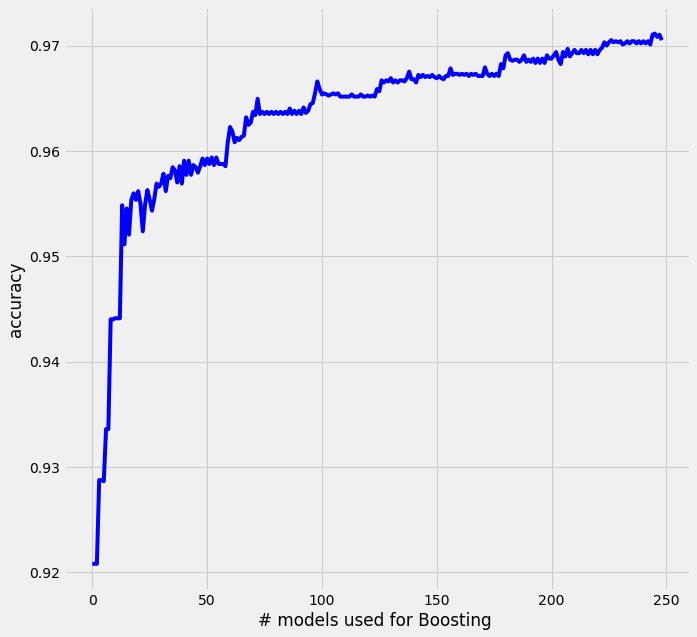

In [158]:
######Plot the accuracy of the model against the number of stump-models used##########

number_of_base_learners = 250

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(number_of_base_learners):
    model = Boosting(dataset,i,dataset)
    model.fit()
    model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()

### Boosting con Naive Bayes como Weak Learners AJUSTADO:

In [170]:
from sklearn.ensemble import AdaBoostClassifier

# Utilizando AdaBoost para aumentar la precisión
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=250, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)



0.8725085910652921

In [171]:
dataset=df_stream1
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1)




predictions = np.mean(cross_validate(Tree_model,X,Y,cv=100)['test_score'])


print('The accuracy is: ',predictions*100,'%')
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def fit(self):
        # Set the descriptive features and the target feature
        X = self.dataset.drop(['classALeRCE'],axis=1)
        Y = self.dataset['classALeRCE'].where(self.dataset['classALeRCE']==1,-1)

        # Initialize the weights of each sample with wi = 1/N and create a dataframe in which the evaluation is computed
        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the Decision Stump(s)
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) # Mind the deth one --> Decision Stump
            
            # We know that we must train our decision stumps on weighted datasets where the weights depend on the results of
            # the previous decision stumps. To accomplish that, we use the 'weights' column of the above created 
            # 'evaluation dataframe' together with the sample_weight parameter of the fit method.
            # The documentation for the sample_weights parameter sais: "[...] If None, then samples are equally weighted."
            # Consequently, if NOT None, then the samples are NOT equally weighted and therewith we create a WEIGHTED dataset 
            # which is exactly what we want to have.
            model = Tree_model.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['classALeRCE'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['classALeRCE'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])


            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
   
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)


            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            #print('The Accuracy of the {0}. model is : '.format(t+1),accuracy*100,'%')
            #print('The missclassification rate is: ',misclassification*100,'%')
        
        self.alphas = alphas
        self.models = models
            
    def predict(self):
        X_test = self.test_dataset.drop(['classALeRCE'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['classALeRCE'].reindex(range(len(self.test_dataset))).where(self.dataset['classALeRCE']==1,-1)
    
        # With each model in the self.model list, make a prediction 
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
    
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))

   

The accuracy is:  91.66924398625432 %


In [172]:

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=1000, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

### Exportar DF:

In [166]:
#df_stream1.to_csv('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_1.csv')

In [186]:
df_stream1['classALeRCE'].value_counts()

2    4840
1    4711
3     148
Name: classALeRCE, dtype: int64

# Datos ALerce Streamming

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import OzaBagging
from joblib import Parallel, delayed

In [4]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream


### Stream con seleccion de variables :

In [14]:
stream_1 = FileStream('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_1.csv', target_idx=-1)



In [15]:
stream_1

FileStream(cat_features=None,
           filepath='C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/df_fin_ALE_1.csv',
           n_targets=1, target_idx=-1)

In [16]:
stream_1.prepare_for_use()

### Naive bayes online:

In [17]:
from skmultiflow.bayes import NaiveBayes
clf = NaiveBayes()
clf

NaiveBayes(nominal_attributes=None)

<IPython.core.display.Javascript object>


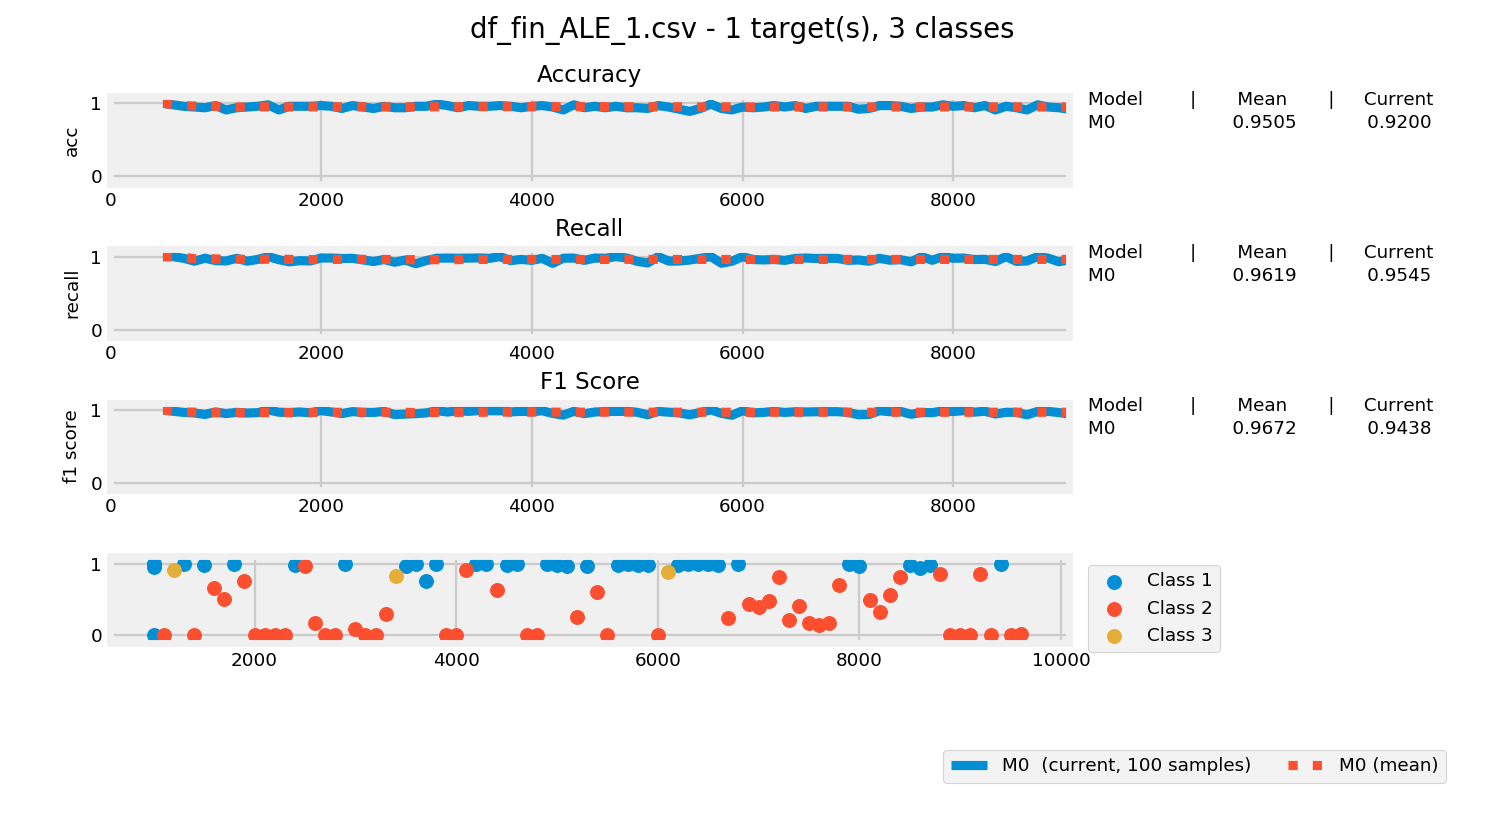

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [21.91s]
Processed samples: 9198
Mean performance:
M0 - Accuracy     : 0.9505
M0 - Recall: 0.9619
M0 - F1 score: 0.9672


[NaiveBayes(nominal_attributes=None)]

In [222]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=500,n_wait = 100,data_points_for_classification=True,
                                max_samples=20000,output_file='results.csv',metrics=['accuracy','recall','f1'])
# 4. Run evaluation
evaluator.evaluate(stream=stream_1, model=clf)

### Bagging Online con Naive Bayes como weak learner:

In [9]:
# 2 Bagging Oza  con base naives bayes 
nb=NaiveBayes()
clf1 = OzaBagging(base_estimator=nb, n_estimators=250)
clf1

OzaBagging(base_estimator=NaiveBayes(nominal_attributes=None), n_estimators=250,
           random_state=None)

In [11]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=False,metrics=['accuracy','recall'],n_wait = 100,
                                pretrain_size=500,
                                max_samples=10000)
# 4. Run evaluation

evaluator.evaluate(stream=stream_1, model=clf1)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [1829.42s]
Processed samples: 9198
Mean performance:
M0 - Accuracy     : 0.9515
M0 - Recall: 0.9620


[OzaBagging(base_estimator=NaiveBayes(nominal_attributes=None), n_estimators=250,
            random_state=None)]

### Boosting Online con Naive Bayes como weak learner:

In [18]:
from skmultiflow.meta import OnlineBoosting
from sklearn import tree
#  Boosting Oza  con base naives bayes 
nb1=NaiveBayes()
clf2 = OnlineBoosting(base_estimator=nb1, n_estimators=250)
clf2

OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
               drift_detection=True, n_estimators=None, random_state=None)

In [19]:

# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=False,metrics=['accuracy','recall'],n_wait = 100,
                                pretrain_size=500,
                                max_samples=10000)
# 4. Run evaluation
evaluator.evaluate(stream=stream_1, model=clf2)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
unsupported operand type(s) for -: 'int' and 'NoneType'
Processed samples: 501
Mean performance:
M0 - Accuracy     : 1.0000


TypeError: 'NoneType' object is not subscriptable